In [ ]:
#Installation of Qiskit
!pip install qiskit[all]


In [ ]:
#Installation of the Qiskit Aer quantum simulator
!pip install qiskit-aer


# **Quantum Galton board code with 4 levels**


In [10]:
# Implementation inspired by:
# Carney, M. and Varcoe, B. (2022).
# "Universal Statistical Simulator".
# arXiv:2202.01735 [quant-ph].
# Available at: https://arxiv.org/abs/2202.01735

Counting results: {'0000000010': 622, '0010000000': 2484, '1000000000': 610, '0000100000': 3768, '0000001000': 2516}


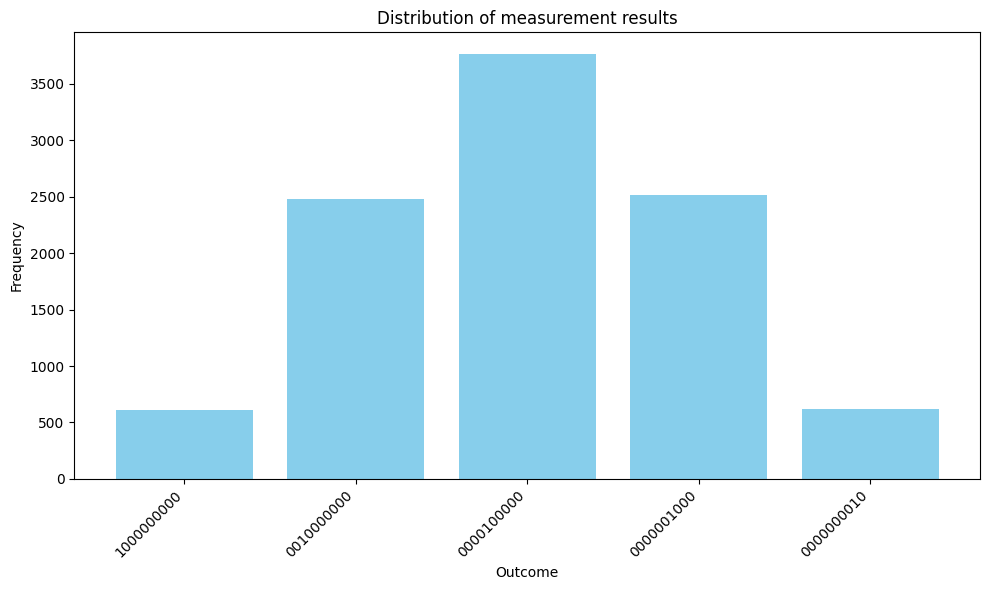

In [11]:
#Import the libraries
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from scipy.stats import norm


#Create quantum and classical registers
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(q, c)

# level 1
circuit.reset(q[0])
circuit.x(q[5])
circuit.h(q[0])
circuit.cswap(q[0], q[4], q[5])
circuit.cx(q[5], q[0])
circuit.cswap(q[0], q[5], q[6])

# level 2
circuit.reset(q[0])
circuit.h(q[0])
circuit.cswap(q[0], q[3], q[4])
circuit.cx(q[4], q[0])
circuit.cswap(q[0], q[4], q[5])
circuit.cx(q[5], q[0])
circuit.cswap(q[0], q[6], q[7])
circuit.cx(q[6], q[0])
circuit.cswap(q[0], q[5], q[6])

# level 3
circuit.reset(q[0])
circuit.h(q[0])
circuit.cswap(q[0], q[2], q[3])
circuit.cx(q[3], q[0])
circuit.cswap(q[0], q[3], q[4])
circuit.cx(q[4], q[0])
circuit.cswap(q[0], q[7], q[8])
circuit.cx(q[7], q[0])
circuit.cswap(q[0], q[6], q[7])
circuit.cx(q[6], q[0])
circuit.cswap(q[0], q[5], q[6])
circuit.cx(q[5], q[0])
circuit.cswap(q[0], q[4], q[5])

# level 4
circuit.reset(q[0])
circuit.h(q[0])
circuit.cswap(q[0], q[1], q[2])
circuit.cx(q[2], q[0])
circuit.cswap(q[0], q[2], q[3])
circuit.cx(q[3], q[0])
circuit.cswap(q[0], q[3], q[4])
circuit.cx(q[4], q[0])
circuit.cswap(q[0], q[4], q[5])
circuit.cx(q[5], q[0])
circuit.cswap(q[0], q[5], q[6])
circuit.cx(q[6], q[0])
circuit.cswap(q[0], q[6], q[7])
circuit.cx(q[7], q[0])
circuit.cswap(q[0], q[7], q[8])
circuit.cx(q[8], q[0])
circuit.cswap(q[0], q[8], q[9])

# Final measurements
for i in range(1, 10):
    circuit.measure(q[i], c[i])

# Simulation
simulator = AerSimulator()
job = simulator.run(circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print("Counting results:", counts)

# Sort the counts dictionary by key (outcome) in descending order
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[0], reverse = True))

labels = list(sorted_counts.keys())
values = list(sorted_counts.values())

#Graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of measurement results')
plt.tight_layout()
plt.show()



# **Generalization of the Galton board for n levels (First version)**

Counting results: {'0010000000000': 949, '1000000000000': 147, '0000000000001': 149, '0000100000000': 2301, '0000001000000': 3184, '0000000000100': 925, '0000000010000': 2345}


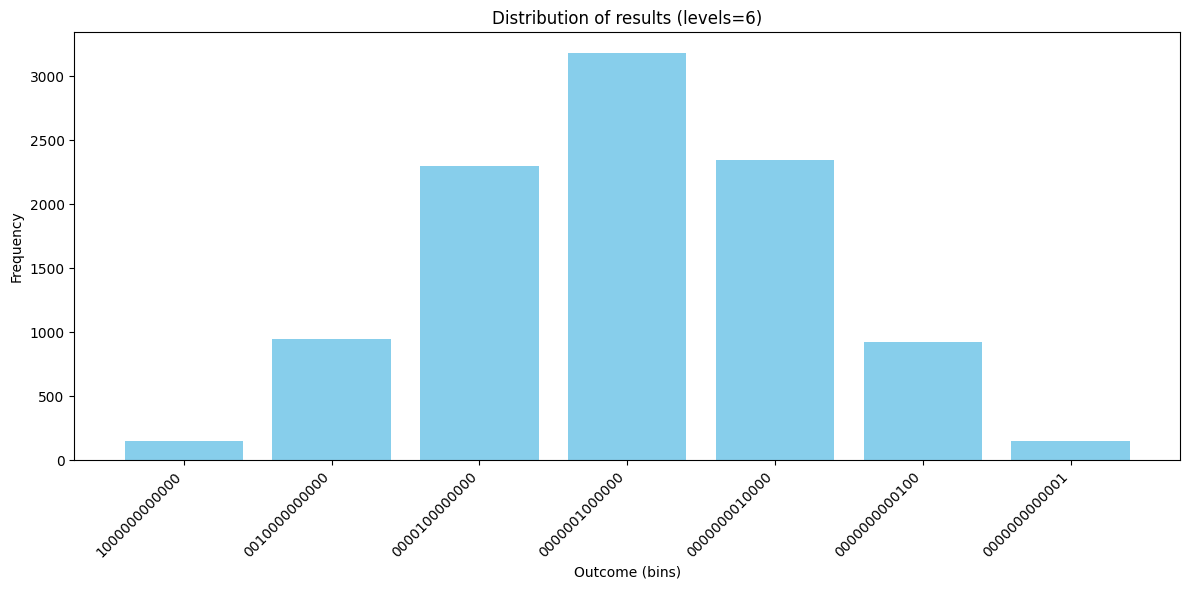

In [12]:
#Import the libraries
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

# Number of levels
n = 6
# Total qubits: 1 ancilla + (2*n+1) bins
total_qubits = 2*n + 2
# index of the central bin
mid = n + 1

# Create quantum and classical records
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')
circuit = QuantumCircuit(q, c)

# ------------------------------------------------------
# 1) Function that implements a single (partially) "peg"
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)
    circ.cx(j, coin)

#2) Function that generates a level with k pegs
def build_level(circ: QuantumCircuit, coin: int, k: int):
    circ.reset(coin)
    circ.h(coin)

    for i in range(mid - k, mid + k):
        apply_peg(circ, coin, i, i + 1)

# ------------------------------------------------------

# 0) Initialize the ball in the center bin
circuit.x(q[mid])

# 1) Create the n levesl
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level)
    circuit.barrier()

# 2) Measurements
for i in range(1, total_qubits):
    circuit.measure(q[i], c[i-1])

#Simulation
def run_and_plot(circ: QuantumCircuit, shots: int = 10000):
    simulator = AerSimulator()
    job = simulator.run(circ, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("Counting results:", counts)


    #Histogram
    sorted_counts = dict(sorted(counts.items(), key=lambda x: x[0], reverse=True))
    labels = list(sorted_counts.keys())
    values = list(sorted_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Outcome (bins)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of results (levels={n})')
    plt.tight_layout()
    plt.show()

# Execute
run_and_plot(circuit)


# **Generalization of the Galton board for n levels (Optimized version)**

Counting results: {'0000000000000000000000000000000000000000000000000010000000000': 2, '0000000000100000000000000000000000000000000000000000000000000': 2, '0000000000000000000000000000000000000000000000001000000000000': 8, '0000000000000010000000000000000000000000000000000000000000000': 28, '0000000000000000000000000000000010000000000000000000000000000': 1351, '0000000000000000000000000000000000000000001000000000000000000': 141, '0000000000000000000000000000000000100000000000000000000000000': 1113, '0000000000000000000000000000000000001000000000000000000000000': 772, '0000000000000000000000100000000000000000000000000000000000000': 508, '0000000000000000000000000010000000000000000000000000000000000': 1145, '0000000000000000000000001000000000000000000000000000000000000': 815, '0000000000000000100000000000000000000000000000000000000000000': 62, '0000000000000000000000000000100000000000000000000000000000000': 1359, '0000000000000000000000000000001000000000000000000000000000000': 1458, '000

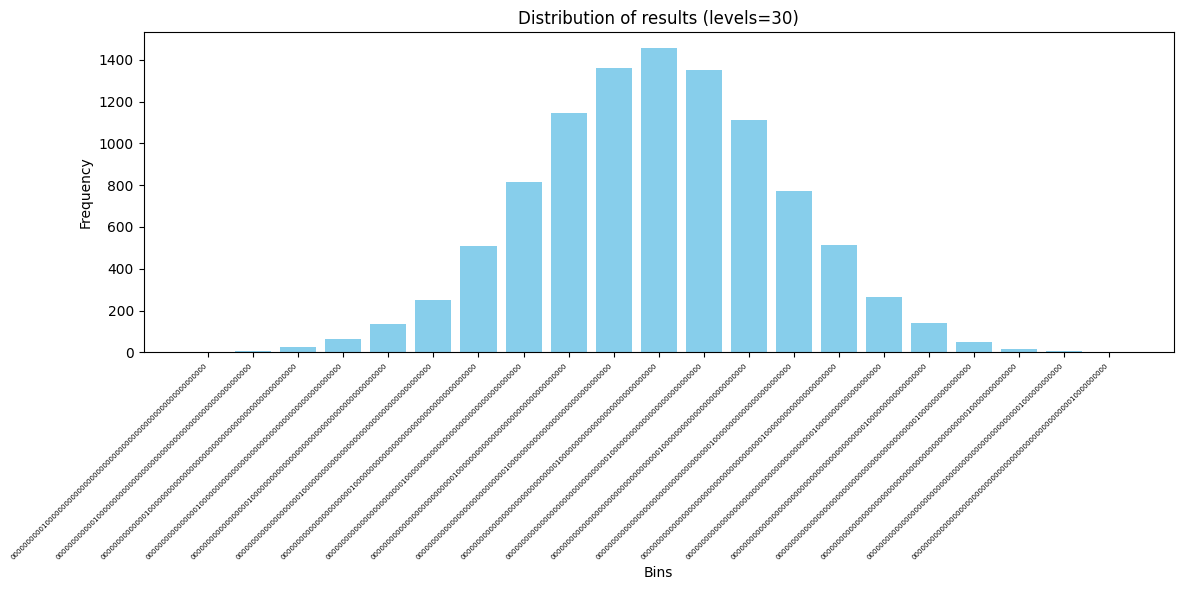

In [13]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

# Number of levels
n = 30
# Total qubits: 1 ancilla (coin) + (2*n+1) bins
total_qubits = 2 * n + 2
# index of the central bin
mid = n + 1

# Create quantum and classical records
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')  # we measure only the bins
circuit = QuantumCircuit(q, c)

#1) Function that applies a single 'peg'
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)
    circ.cx(j, coin)

#2) Function that generates a level with k pegs.
def build_level(circ: QuantumCircuit, coin: int, k: int):
    circ.reset(coin)
    circ.h(coin)
    start, end = mid - k, mid + k
    for target in range(start, end):
        apply_peg(circ, coin, target, target + 1)
#-------------------------------------------------------------------------
# 0) Initialize the ball in the center bin
circuit.x(q[mid])

#Building Galton's levels
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level)

# Measurements
for idx in range(1, total_qubits):
    circuit.measure(q[idx], c[idx - 1])

# Instantiate AerSimulator using the 'matrix_product_state' (MPS) method,
# which leverages tensor networks to efficiently simulate quantum states with limited entanglement
simulator = AerSimulator(method='matrix_product_state')

# Transpile the circuit for AerSimulator with optimization_level=3
# (maximizes gate fusion, cancels redundant gates, and minimizes circuit depth)
circuit_optimized = transpile(circuit, simulator, optimization_level=3)

#Simulation
def run_quantum_mps(circ: QuantumCircuit, shots: int = 10000):
    job = simulator.run(circ, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("Counting results:", counts)
    _plot_counts(counts, title=f"Distribution of results (levels={n})")

# Function to graph counts
def _plot_counts(counts: dict, title: str):
    labels = sorted(counts.keys(), key=lambda x: int(x, 2), reverse= True)
    values = [counts[label] for label in labels]
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=45, ha='right',  fontsize= 5)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()


run_quantum_mps(circuit_optimized)



**Fit to a Gaussian distribution**

Counting results: {'0000000000100000000000000000000000000000000000000000000000000': 1, '0000000000000000000000000000000000000000000000000010000000000': 1, '0000000000000010000000000000000000000000000000000000000000000': 17, '0000000000000000000000000000000000000000000000001000000000000': 8, '0000000000000000000000000000000000000000000010000000000000000': 59, '0000000000000000000000000000100000000000000000000000000000000': 1358, '0000000000000000000000000000001000000000000000000000000000000': 1461, '0000000000000000001000000000000000000000000000000000000000000': 142, '0000000000000000000010000000000000000000000000000000000000000': 274, '0000000000001000000000000000000000000000000000000000000000000': 7, '0000000000000000000000000000000000000000000000100000000000000': 21, '0000000000000000000000000000000000000010000000000000000000000': 480, '0000000000000000000000000000000000000000100000000000000000000': 292, '0000000000000000000000000000000000001000000000000000000000000': 786, '000000000

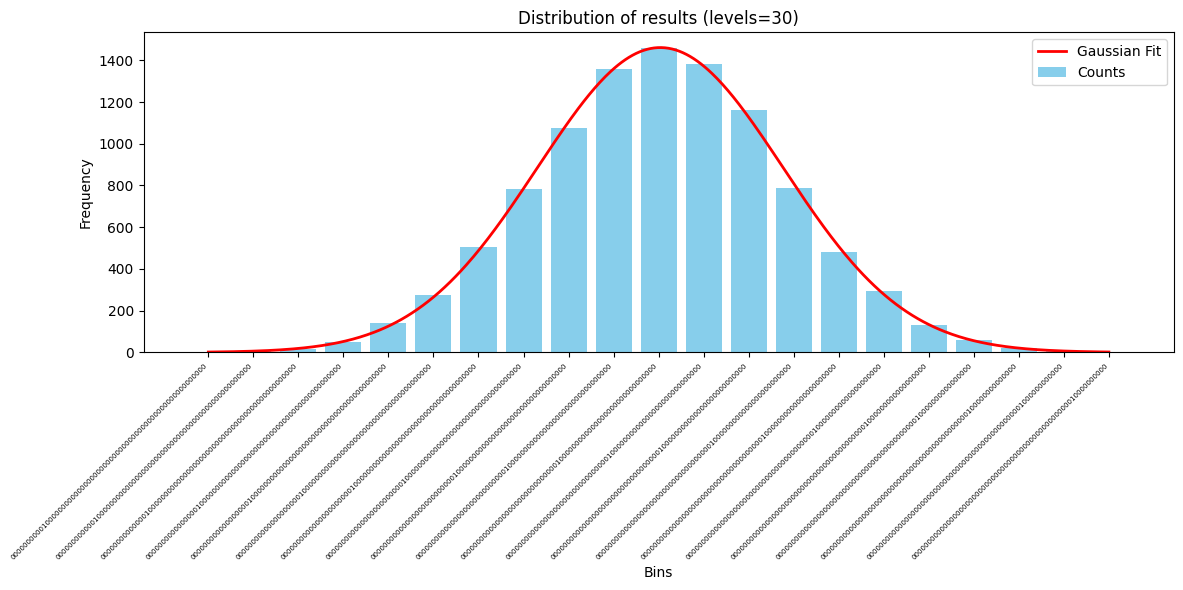

In [14]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
from scipy.optimize import curve_fit

# Number of levels
n = 30
# Total qubits: 1 ancilla (coin) + (2*n+1) bins
total_qubits = 2 * n + 2
# index of the central bin
mid = n + 1

# Create quantum and classical records
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')  # we measure only the bins
circuit = QuantumCircuit(q, c)

#1) Function that applies a single 'peg'
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)
    circ.cx(j, coin)

#2) Function that generates a level with k pegs.
def build_level(circ: QuantumCircuit, coin: int, k: int):
    circ.reset(coin)
    circ.h(coin)
    start, end = mid - k, mid + k
    for target in range(start, end):
        apply_peg(circ, coin, target, target + 1)
#-------------------------------------------------------------------------
# 0) Initialize the ball in the center bin
circuit.x(q[mid])

# Construir los niveles de Galton
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level)

# Measure all bins
for idx in range(1, total_qubits):
    circuit.measure(q[idx], c[idx - 1])

# Instantiate AerSimulator using the 'matrix_product_state' (MPS) method,
# which leverages tensor networks to efficiently simulate quantum states with limited entanglement
simulator = AerSimulator(method='matrix_product_state')

# Transpile the circuit for AerSimulator with optimization_level=3
# (maximizes gate fusion, cancels redundant gates, and minimizes circuit depth)
circuit_optimized = transpile(circuit, simulator, optimization_level=3)

#Simulation
def run_quantum_mps(circ: QuantumCircuit, shots: int = 10000):
    job = simulator.run(circ, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("Counting results:", counts)
    _plot_counts(counts, title=f"Distribution of results (levels={n})")

def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

def _plot_counts(counts: dict, title: str):
    labels = sorted(counts.keys(), key=lambda x: int(x, 2), reverse=True)
    values = [counts[label] for label in labels]

   # Convert labels to numeric indices
    x = np.arange(len(labels))
    y = np.array(values)

    # Gaussian fit
    try:
        popt, _ = curve_fit(gaussian, x, y, p0=[max(y), np.mean(x), np.std(x)])
        a, mu, sigma = popt

        # Print parameters
        print(f"Gausiisan fit:")
        print(f"  mu    = {mu:.3f}")
        print(f"  sigma = {sigma:.3f}")

        x_fit = np.linspace(min(x), max(x), 500)
        y_fit = gaussian(x_fit, *popt)
    except RuntimeError:
        print("A Gaussian curve could not be fitted")
        x_fit, y_fit = [], []

    # Graph
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue', label='Counts')

    if len(x_fit):
        plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Gaussian Fit')

    plt.xticks(rotation=45, ha='right', fontsize=5)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

run_quantum_mps(circuit_optimized)


# **Drawing the circuit**

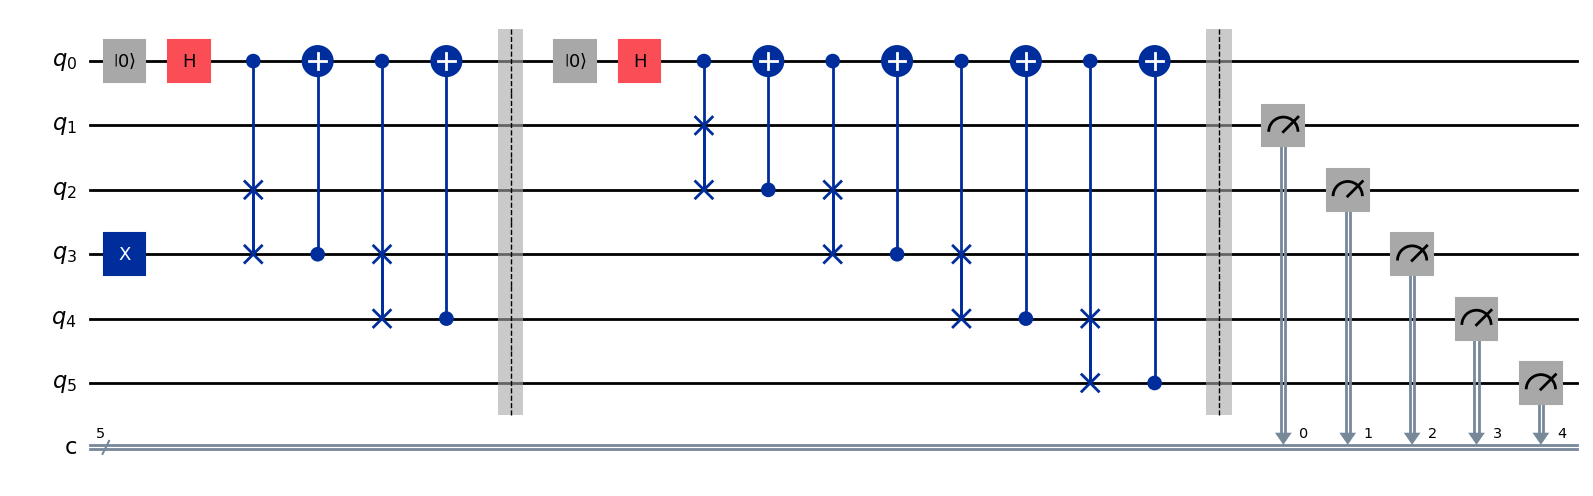

In [15]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#number of levels
n = 2
total_qubits = 2*n + 2
mid = n + 1

# Create quantum and classical records
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')
circuit = QuantumCircuit(q, c)

# ------------------------------------------------------
#1) Function that implements a single "peg"
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)
    circ.cx(j, coin)

# 2) Function that implements a level with k "pegs"
def build_level(circ: QuantumCircuit, coin: int, k: int, mid: int):
    circ.reset(coin)
    circ.h(coin)
    for i in range(mid - k, mid + k):
        apply_peg(circ, coin, i, i + 1)

# ------------------------------------------------------

#0) Initialize the ball in the center bin
circuit.x(q[mid])

# 1) Create the n levels
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level, mid=mid)
    circuit.barrier()

# 2) Measurements (excluding the ancilla q[0])
for i in range(1, total_qubits):
    circuit.measure(q[i], c[i-1])

# Draw the circuit for n=3
display(circuit.draw('mpl', fold=80, style='iqp'))



# **Exponential distribution**

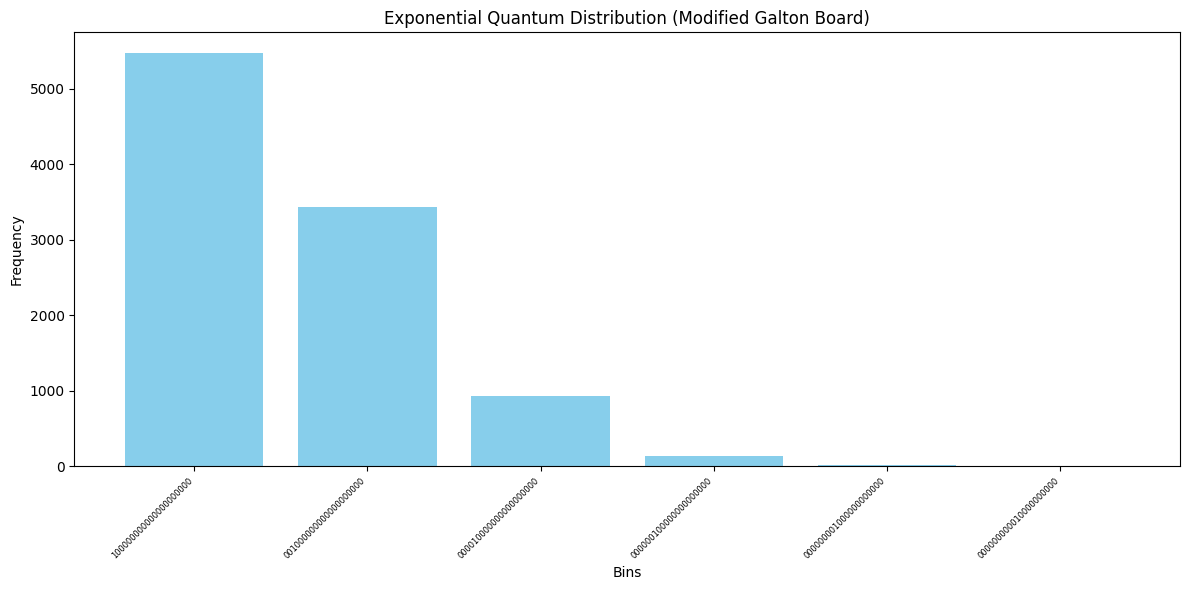

{'000000000010000000000': 3, '000000001000000000000': 14, '000000100000000000000': 143, '000010000000000000000': 934, '100000000000000000000': 5470, '001000000000000000000': 3436}


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

# General parameters
n = 10                 # number of levels
total_qubits = 2 * n + 2 # 1 ancilla qubit + (2n+1) position qubits
mid = n + 1              # index of the central bin

# Create quantum and classical registers
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')
circuit = QuantumCircuit(q, c)

# ------------------------------------------------------------------
# Function that implements a single "peg"
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)
    circ.cx(j, coin)

# Function that builds one level with an exponentially decaying bias
def build_level(circ: QuantumCircuit, coin: int, k: int, theta0=pi/4, alpha= 1):
    circ.reset(coin)
    # Compute rotation angle that decays exponentially with level index k
    theta_k = theta0 * np.exp(-alpha * k)
    # Apply an RY rotation to bias the coin
    circ.ry(theta_k, coin)

    start, end = mid - k, mid + k
    for target in range(start, end):
        apply_peg(circ, coin, target, target + 1)

# Initialize the "ball" in the central bin
circuit.x(q[mid])

# Build the modified quantum Galton board with exponential bias
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level, theta0=pi/2 * 0.5, alpha=0.1)

# Measure all position qubits (skip the coin at q[0])
for idx in range(1, total_qubits):
    circuit.measure(q[idx], c[idx - 1])

# Set up and optimize the simulator
simulator = AerSimulator(method='matrix_product_state')
circuit_optimized = transpile(circuit, simulator, optimization_level=3)

#Graph
def _plot_counts(counts, title):
    # Sort binary labels in descending numerical order
    labels = sorted(counts.keys(), key=lambda x: int(x, 2), reverse=True)
    values = [counts[k] for k in labels]
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Run the circuit and display the exponential-like distribution
def run_quantum_mps(circ, shots=10000):
    job = simulator.run(circ, shots=shots)
    result = job.result()
    counts = result.get_counts()
    _plot_counts(counts, title="Exponential Quantum Distribution (Modified Galton Board)")
    print(counts)
# Execute simulation
run_quantum_mps(circuit_optimized)



# **Hadamard quantum walk**

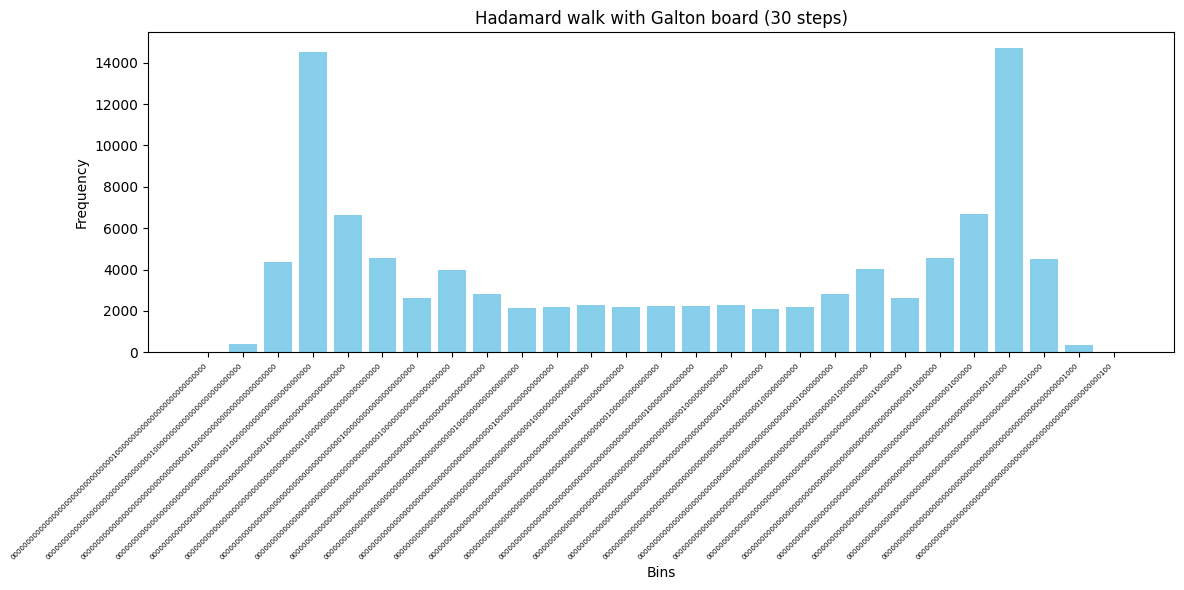

In [7]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

#Number of levels
n =30
# Total qubits: 1 ancilla (coin) + (2*n+1) bins
total_qubits = 2 * n + 2
# index of the central bin
mid = n + 1

# Create quantum and classical records
q = QuantumRegister(total_qubits, 'q')
c = ClassicalRegister(total_qubits - 1, 'c')
circuit = QuantumCircuit(q, c)

# 1) Function that implements a single "peg"
def apply_peg(circ: QuantumCircuit, coin: int, i: int, j: int):
    circ.cswap(coin, i, j)

#2) Function that generates a level with k pegs.
def build_level(circ: QuantumCircuit, coin: int, k: int):
    # Hadamard Coin
    circ.h(coin)
    start, end = mid - k, mid + k
    for target in range(start, end):
        apply_peg(circ, coin, target, target + 1)

#Inicialization
circuit.h(0)
circuit.s(0)
# Ball in the central bin
circuit.x(q[mid])

# Build levels
for level in range(1, n + 1):
    build_level(circuit, coin=0, k=level)

# Measurement
for idx in range(1, total_qubits):
    circuit.measure(q[idx], c[idx - 1])

# Simulator
simulator = AerSimulator(method='matrix_product_state')
circuit_opt = transpile(circuit, simulator, optimization_level=3)

# Run and graph
def run_quantum_walk(circ, shots=100000):
    job = simulator.run(circ, shots=shots)
    result = job.result()
    counts = result.get_counts()

    labels = sorted(counts.keys(), key=lambda x: int(x, 2), reverse=True)
    values = [counts[label] for label in labels]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=5)
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title(f"Hadamard walk with Galton board ({n} steps)")
    plt.tight_layout()
    plt.show()


run_quantum_walk(circuit)
